In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
from pathlib import Path

- (A-1b) Analýza štruktúr dát ako súbory (štruktúry a vzťahy, počet, typy, …), záznamy (štruktúry, počet záznamov, počet atribútov, typy, …)

In [132]:
# súbory sú 4 a všetky typu .csv a pre všetky platí, že ich separátorom je \tab 
# pocet rows a columns mozme vidiet v ulohe A z metody .info() tak isto aj typy columns a memory usage

# subory na seba nie su zavisle a nedaju sa ani cez ziadny kluc spojit dokopy
# maju spolocny atribut imei ale tento nie je unikatny a preto sa neda povazovat
# za piramry key na joinovanie 

In [133]:
folder = Path("./070")

# This code will handle the column 'ts' as datetime type instead of string
data = pd.read_csv(folder / "connections.csv", delimiter="\t", parse_dates=['ts'])
data.info()
data.describe()

# NOTES connections.csv:
# column 'ts' had to be converted to date from a string
# all necessary info is in data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15068 entries, 0 to 15067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ts                 15068 non-null  datetime64[ns]
 1   imei               15068 non-null  int64         
 2   mwra               15068 non-null  float64       
 3   c.android.youtube  15068 non-null  float64       
 4   c.katana           15068 non-null  float64       
 5   c.dogalize         15068 non-null  float64       
 6   c.android.chrome   15068 non-null  float64       
 7   c.android.gm       15068 non-null  float64       
 8   c.UCMobile.x86     15068 non-null  float64       
 9   c.raider           15068 non-null  float64       
 10  c.android.vending  15068 non-null  float64       
 11  c.updateassist     15068 non-null  float64       
 12  c.UCMobile.intl    15068 non-null  float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 1.5

,ts,imei,mwra,c.android.youtube,c.katana,c.dogalize,c.android.chrome,c.android.gm,c.UCMobile.x86,c.raider,c.android.vending,c.updateassist,c.UCMobile.intl
count,15068,1.506800e+04,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000
mean,2018-05-10 14:03:46.122909696,3.915151e+18,0.627091,14.224016,12.933420,11.213860,11.748367,12.395181,49.691045,50.304422,49.846238,49.795751,49.805725
min,2018-05-05 10:00:00,3.590434e+17,0.000000,5.205940,3.670310,1.794050,1.332370,3.978430,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-05-07 23:58:45,8.630331e+17,0.000000,12.887115,11.041332,9.468405,9.869288,10.526928,24.404520,25.599992,24.614873,24.474610,24.732795
50%,2018-05-10 14:04:30,3.590434e+18,1.000000,14.228200,13.045560,11.071870,11.595440,12.587570,49.596390,50.565775,49.828965,49.450900,49.536500
75%,2018-05-13 04:05:15,8.630331e+18,1.000000,15.546828,14.838530,12.841680,13.576078,14.323585,74.844188,75.281260,75.347318,75.000933,74.833070
max,2018-05-15 18:08:00,8.630331e+18,1.000000,22.757320,22.669430,21.240890,22.079670,20.083960,100.000000,100.000000,100.000000,100.000000,100.000000
std,NaN,3.329756e+18,0.483594,2.016526,2.685007,2.567502,2.700146,2.509716,28.923322,28.806473,29.013212,28.962832,28.841978


In [134]:
data2 = pd.read_csv(folder / "devices.csv", delimiter='\t')
data2.info()
data2.describe()

# NOTES devces.csv:
# two rows have missing code attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2889 non-null   float64
 1   longitude   2889 non-null   float64
 2   store_name  2889 non-null   object 
 3   code        2887 non-null   object 
 4   location    2889 non-null   object 
 5   imei        2889 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 135.6+ KB


,latitude,longitude,imei
count,2889.000000,2889.000000,2.889000e+03
mean,28.873197,10.845267,3.948806e+18
std,23.467101,73.913804,3.347472e+18
min,-54.800000,-156.474320,3.590434e+17
25%,14.836100,-63.134140,8.630331e+17
50%,36.208290,10.302150,3.590434e+18
75%,45.539290,72.685330,8.630331e+18
max,68.798330,178.004170,8.630331e+18


In [135]:
data3 = pd.read_csv(folder / "processes.csv", delimiter='\t', parse_dates=['ts'])
data3.info()
data3.describe()

# NOTES processes.csv:
# attribute ts is string again, it had to be convered to datetime


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15068 entries, 0 to 15067
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ts                          15068 non-null  datetime64[ns]
 1   imei                        15068 non-null  int64         
 2   mwra                        15068 non-null  float64       
 3   p.android.chrome            15068 non-null  float64       
 4   p.android.documentsui       15068 non-null  float64       
 5   p.android.packageinstaller  15068 non-null  float64       
 6   p.android.settings          15068 non-null  float64       
 7   p.android.gm                15068 non-null  float64       
 8   p.android.externalstorage   15068 non-null  float64       
 9   p.system                    15068 non-null  float64       
 10  p.android.gms               15068 non-null  float64       
 11  p.dogalize                  15068 non-null  float64   

,ts,imei,mwra,p.android.chrome,p.android.documentsui,p.android.packageinstaller,p.android.settings,p.android.gm,p.android.externalstorage,p.system,...,p.katana,p.google,p.notifier,p.android.defcontainer,p.android.vending,p.inputmethod.latin,p.simulator,p.olauncher,p.browser.provider,p.gms.persistent
count,15068,1.506800e+04,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,...,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000
mean,2018-05-10 14:03:46.122909696,3.915151e+18,0.627091,13.014366,11.873133,12.413431,11.775762,11.884577,13.565926,13.045076,...,57.771071,50.500848,51.616398,49.479308,50.036077,49.662188,50.022369,50.280685,49.802585,49.596038
min,2018-05-05 10:00:00,3.590434e+17,0.000000,3.966290,1.559730,1.007100,3.161590,4.495340,2.811670,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-05-07 23:58:45,8.630331e+17,0.000000,11.241000,9.978880,10.472025,9.898315,10.061623,12.042350,11.304398,...,49.853383,41.479760,42.143080,24.496468,24.995170,24.685540,24.875740,25.251340,25.369325,24.121492
50%,2018-05-10 14:04:30,3.590434e+18,1.000000,13.145975,11.956695,12.503790,11.470175,11.614480,13.734705,13.316080,...,57.815155,50.508840,51.530220,49.266070,50.377720,49.267805,50.384910,50.065190,49.893115,50.034575
75%,2018-05-13 04:05:15,8.630331e+18,1.000000,14.847605,13.868025,14.388110,13.404352,13.596625,15.226465,14.960355,...,65.631797,59.638595,60.987575,74.711660,75.068038,74.860000,74.912595,75.308072,74.213670,74.835037
max,2018-05-15 18:08:00,8.630331e+18,1.000000,21.390630,19.398150,22.167830,23.608310,21.760910,21.647200,22.044580,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
std,NaN,3.329756e+18,0.483594,2.581229,2.629561,2.734532,2.684841,2.499453,2.487413,2.712061,...,11.602200,13.416643,14.111102,28.947431,28.856000,28.973659,28.961131,28.825625,28.700681,29.069049


In [136]:
data4 = pd.read_csv(folder / "profiles.csv", delimiter='\t')
data4.info()
data4.describe()


# NOTES profiles.csv:
# almost every attribute except imei and user_id are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2611 entries, 0 to 2610
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   address           2219 non-null   object
 1   job               783 non-null    object
 2   birthdate         1436 non-null   object
 3   name              2611 non-null   object
 4   registration      2611 non-null   object
 5   imei              2611 non-null   int64 
 6   ssn               2611 non-null   object
 7   username          2611 non-null   object
 8   user_id           2611 non-null   int64 
 9   company           2611 non-null   object
 10  current_location  2480 non-null   object
 11  mail              2611 non-null   object
dtypes: int64(2), object(10)
memory usage: 244.9+ KB


,imei,user_id
count,2.611000e+03,2611.000000
mean,3.840125e+18,1334.298353
std,3.322799e+18,761.287518
min,3.590434e+17,0.000000
25%,8.630331e+17,684.500000
50%,3.590434e+18,1357.000000
75%,8.630331e+18,1981.000000
max,8.630331e+18,2610.000000


In [137]:
# all attributes:
# ['ts', 'imei', 'mwra', 'c.android.youtube', 'c.katana', 'c.dogalize',
# 'c.android.chrome', 'c.android.gm', 'c.UCMobile.x86', 'c.raider',
# 'c.android.vending', 'c.updateassist', 'c.UCMobile.intl']

# ['latitude', 'longitude', 'store_name', 'code', 'location', 'imei']

# ['ts', 'imei', 'mwra', 'p.android.chrome', 'p.android.documentsui',
# 'p.android.packageinstaller', 'p.android.settings', 'p.android.gm',
# 'p.android.externalstorage', 'p.system', 'p.android.gms', 'p.dogalize',
# 'p.process.gapps', 'p.katana', 'p.google', 'p.notifier',
# 'p.android.defcontainer', 'p.android.vending', 'p.inputmethod.latin',
# 'p.simulator', 'p.olauncher', 'p.browser.provider', 'p.gms.persistent']

#['address', 'job', 'birthdate', 'name', 'registration', 'imei', 'ssn',
# 'username', 'user_id', 'company', 'current_location', 'mail']


# all data have imei attribute

- (B-1b) Analýza jednotlivých atribútov: pre zvolené významné atribúty (min 10) analyzujte ich distribúcie a základné deskriptívne štatistiky. 


In [138]:
# interesting attributes
#1.
data2['code'].value_counts()

code
US    492
IN    189
RU    171
DE    145
BR    126
     ... 
SA      1
MN      1
ML      1
CF      1
RE      1
Name: count, Length: 132, dtype: int64

Text(0.5, 1.0, 'Frequency of Country Codes (code)')

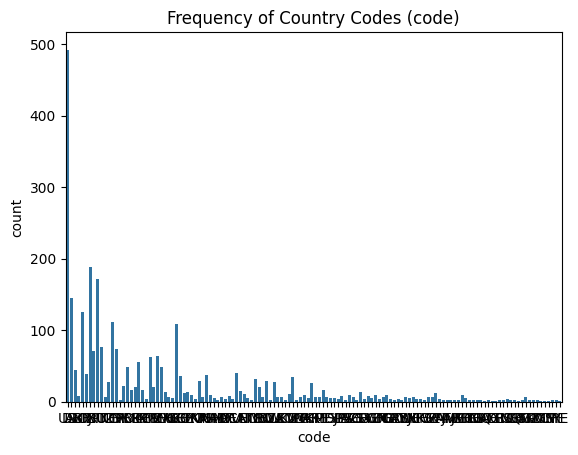

In [139]:
sns.countplot(x='code', data=data2)
plt.title('Frequency of Country Codes (code)')

Text(0.5, 1.0, 'Frequency of Country Codes (code)')

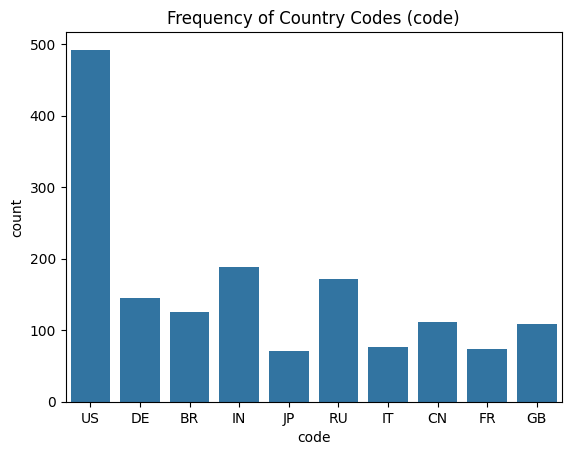

In [140]:
# because there is so many country codes we will only look at the top 10 for sake of clarence
top_codes = data2['code'].value_counts().index[:10]
data2_top = data2[data2['code'].isin(top_codes)]
sns.countplot(x='code', data=data2_top)
plt.title('Frequency of Country Codes (code)')

In [141]:
#2.
data2['imei'].describe()

count    2.889000e+03
mean     3.948806e+18
std      3.347472e+18
min      3.590434e+17
25%      8.630331e+17
50%      3.590434e+18
75%      8.630331e+18
max      8.630331e+18
Name: imei, dtype: float64

Text(0.5, 1.0, 'Distribution of IMEI')

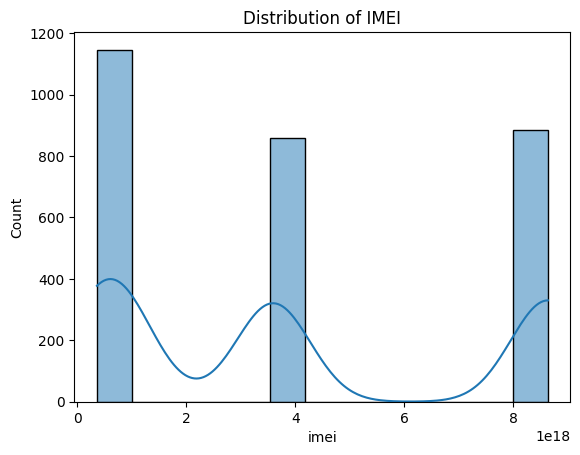

In [142]:
sns.histplot(data2['imei'], kde=True)
plt.title('Distribution of IMEI')

In [143]:
#3.
data3['p.katana'].describe()

count    15068.000000
mean        57.771071
std         11.602200
min          0.000000
25%         49.853383
50%         57.815155
75%         65.631797
max        100.000000
Name: p.katana, dtype: float64

Text(0.5, 1.0, 'Distribution of p.katana')

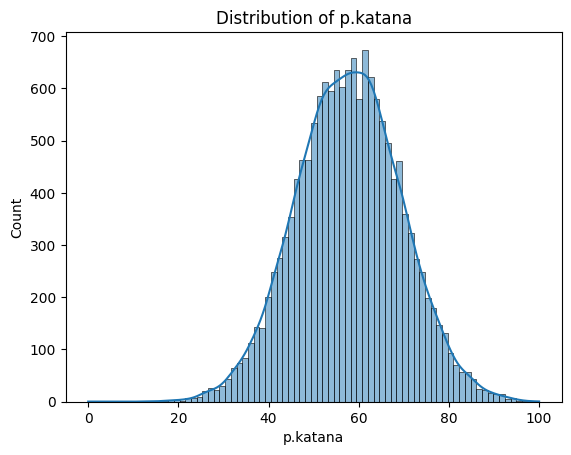

In [144]:
sns.histplot(data3['p.katana'], kde=True)
plt.title('Distribution of p.katana')
# no-skewness normal distributed

In [145]:
#4.
data3['p.android.documentsui'].describe()

count    15068.000000
mean        11.873133
std          2.629561
min          1.559730
25%          9.978880
50%         11.956695
75%         13.868025
max         19.398150
Name: p.android.documentsui, dtype: float64

Text(0.5, 1.0, 'Distribution of p.android.documentsui')

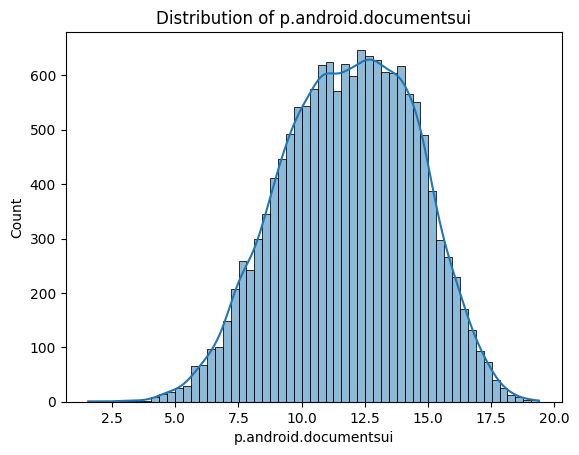

In [146]:
sns.histplot(data3['p.android.documentsui'], kde=True)
plt.title('Distribution of p.android.documentsui')
# slight left-skewness normal distributed

In [147]:
#5.
data['c.UCMobile.intl'].describe()

count    15068.000000
mean        49.805725
std         28.841978
min          0.000000
25%         24.732795
50%         49.536500
75%         74.833070
max        100.000000
Name: c.UCMobile.intl, dtype: float64

Text(0.5, 1.0, 'Distribution of c.UCMobile.intl')

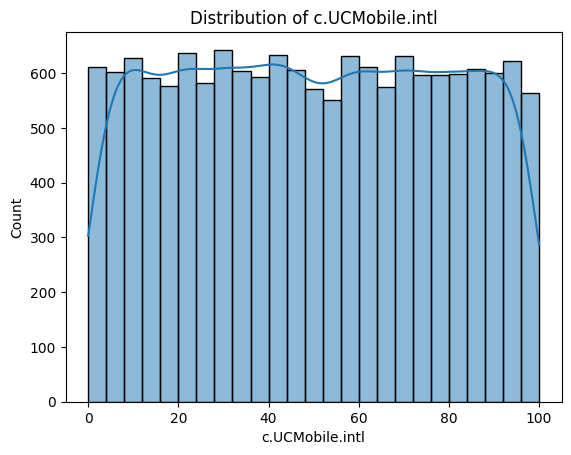

In [148]:
sns.histplot(data['c.UCMobile.intl'], kde=True)
plt.title('Distribution of c.UCMobile.intl')
#looks like uniform distribution

In [149]:
#6.
data['c.UCMobile.x86'].describe()

count    15068.000000
mean        49.691045
std         28.923322
min          0.000000
25%         24.404520
50%         49.596390
75%         74.844188
max        100.000000
Name: c.UCMobile.x86, dtype: float64

Text(0.5, 1.0, 'Distribution of c.UCMobile.x86')

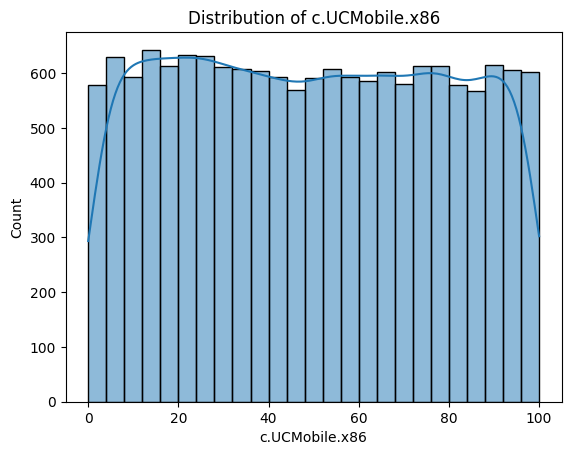

In [150]:
sns.histplot(data['c.UCMobile.x86'], kde=True)
plt.title('Distribution of c.UCMobile.x86')
#looks like uniform distribution

In [151]:
#7.
data['c.android.gm'].describe()

count    15068.000000
mean        12.395181
std          2.509716
min          3.978430
25%         10.526928
50%         12.587570
75%         14.323585
max         20.083960
Name: c.android.gm, dtype: float64

Text(0.5, 1.0, 'Distribution of c.android.gm')

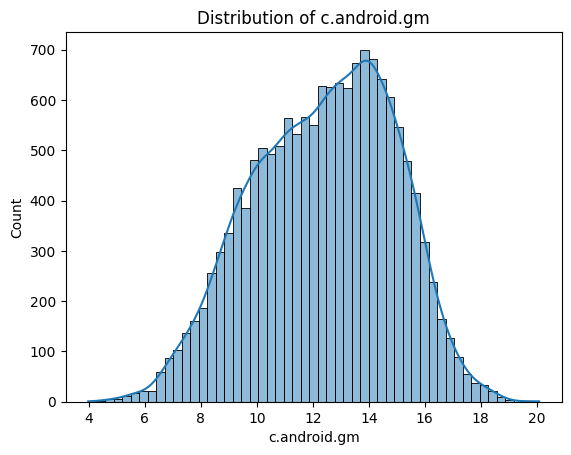

In [152]:
sns.histplot(data['c.android.gm'], kde=True)
plt.title('Distribution of c.android.gm')
# left-skewness normal distributed

In [153]:
#8.
data['c.android.chrome'].describe()

count    15068.000000
mean        11.748367
std          2.700146
min          1.332370
25%          9.869288
50%         11.595440
75%         13.576078
max         22.079670
Name: c.android.chrome, dtype: float64

Text(0.5, 1.0, 'Distribution of c.android.chrome')

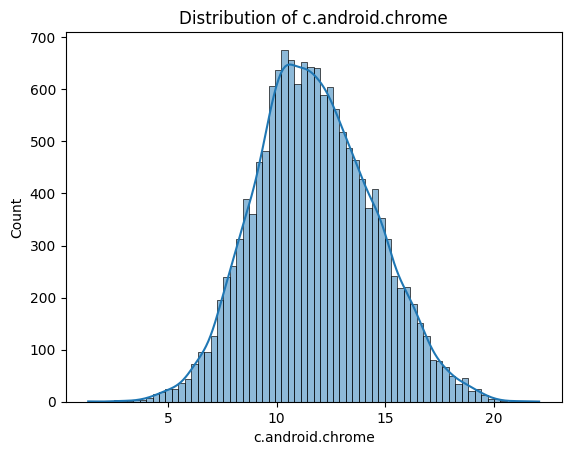

In [154]:
sns.histplot(data['c.android.chrome'], kde=True)
plt.title('Distribution of c.android.chrome')
# slight right-skewness normal distributed

In [155]:
#9.
data3['p.android.gms'].describe()

count    15068.000000
mean        51.009473
std         12.707881
min          0.000000
25%         42.415372
50%         51.004665
75%         59.411745
max        100.000000
Name: p.android.gms, dtype: float64

Text(0.5, 1.0, 'Distribution of p.android.gms')

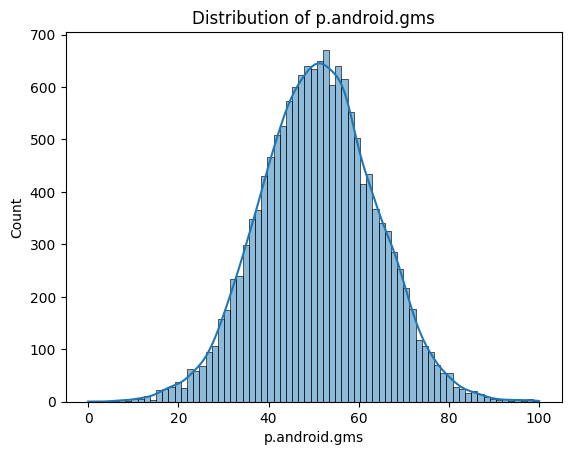

In [156]:
sns.histplot(data3['p.android.gms'], kde=True)
plt.title('Distribution of p.android.gms')
# no-skewness normal distributed

In [157]:
#10.
data3['p.android.gm'].describe()

count    15068.000000
mean        11.884577
std          2.499453
min          4.495340
25%         10.061623
50%         11.614480
75%         13.596625
max         21.760910
Name: p.android.gm, dtype: float64

Text(0.5, 1.0, 'Distribution of p.android.gm')

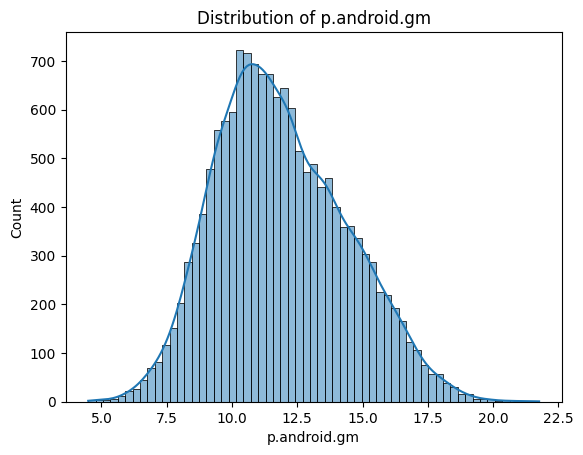

In [158]:
sns.histplot(data3['p.android.gm'], kde=True)
plt.title('Distribution of p.android.gm')
# right-skewness normal distributed

- (C-1b) Párová analýza dát: Identifikujte vzťahy a závislostí medzi dvojicami atribútov.

In [159]:
# In this section we will compare and analyze 5 pairs made from the 10 previous chosen atributes
# we can use following methods for pair analysis

# continuous-continuous - dependence, correlation
# continuous-categorical - difference in the value of the continous attribute depending on the category
# categorical-categorical - table, ratio of frequency of values

In [160]:

# continuous-categorical
# data2['imei'] - data2['code']
imei_by_code_mean = data2_top.groupby('code')['imei'].mean()
print("Mean IMEI by code:")
print(imei_by_code_mean)

imei_by_code_median = data2_top.groupby('code')['imei'].median()
print("Median IMEI by code:")
print(imei_by_code_median)

Mean IMEI by code:
code
BR    4.425265e+18
CN    3.334333e+18
DE    4.089543e+18
FR    4.000707e+18
GB    3.556977e+18
IN    3.805519e+18
IT    3.606459e+18
JP    4.105304e+18
RU    3.988870e+18
US    4.205505e+18
Name: imei, dtype: float64
Median IMEI by code:
code
BR    3.590434e+18
CN    3.590434e+18
DE    3.590434e+18
FR    3.590434e+18
GB    3.590434e+18
IN    3.590434e+18
IT    3.590434e+18
JP    3.590434e+18
RU    3.590434e+18
US    3.590434e+18
Name: imei, dtype: float64


Text(0.5, 1.0, 'IMEI Distribution by Country Code')

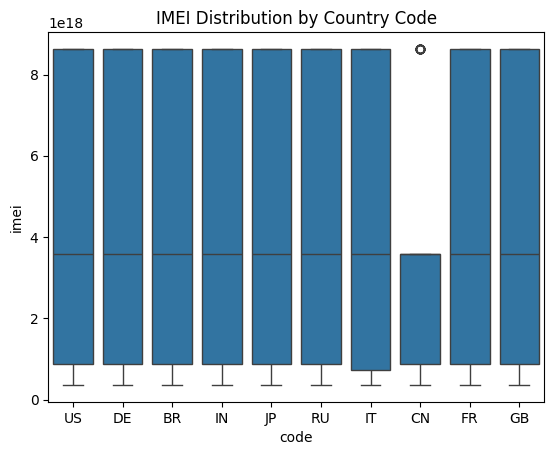

In [161]:
sns.boxplot(x='code', y='imei', data=data2_top)
plt.title('IMEI Distribution by Country Code')


# continuous - continuous 
# data3['p.katana'] - data3['p.android.documentsui']

In [162]:


# Correlation analysis
correlation = data3[['p.katana', 'p.android.documentsui']].corr()
print(correlation)

                       p.katana  p.android.documentsui
p.katana               1.000000              -0.013086
p.android.documentsui -0.013086               1.000000


In [163]:
# z koralecnej matice mozme vidiet ze data nie su takmer vobec medzi sebou zavisle

Text(0, 0.5, 'p.android.documentsui')

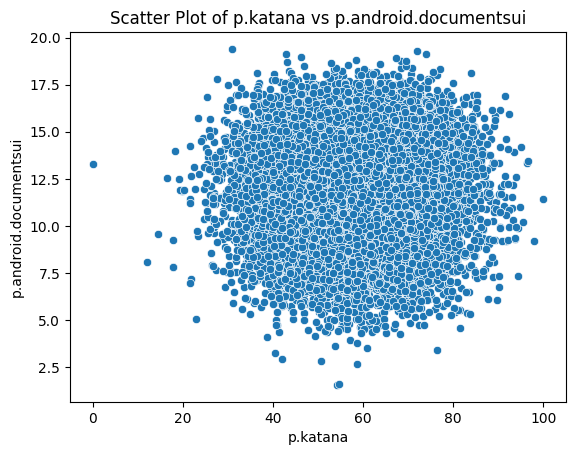

In [164]:
# Scatter plot
sns.scatterplot(x=data3['p.katana'], y=data3['p.android.documentsui'])
plt.title('Scatter Plot of p.katana vs p.android.documentsui')
plt.xlabel('p.katana')
plt.ylabel('p.android.documentsui')


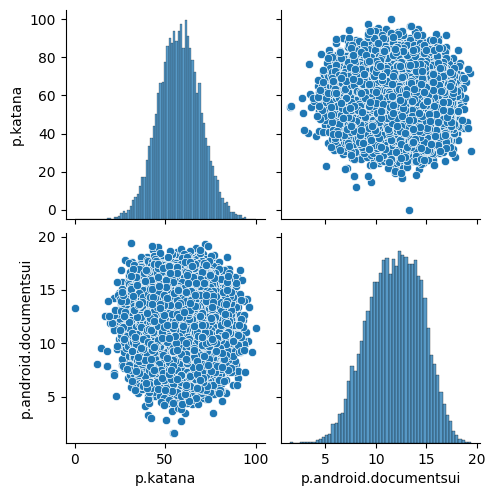

In [165]:
# Pair plot for pairwise analysis
sns.pairplot(data3[['p.katana', 'p.android.documentsui']])

# continuous - continuous 
# data['c.UCMobile.intl'] - data['c.UCMobile.x86']

In [166]:
# Correlation analysis
a, b = ['c.UCMobile.intl', 'c.UCMobile.x86']
correlation = data[[a,b]].corr()
print(correlation)

                 c.UCMobile.intl  c.UCMobile.x86
c.UCMobile.intl         1.000000       -0.000715
c.UCMobile.x86         -0.000715        1.000000


In [167]:
# z koralecnej matice mozme vidiet ze data nie su takmer vobec medzi sebou zavisle

Text(0, 0.5, 'c.UCMobile.x86')

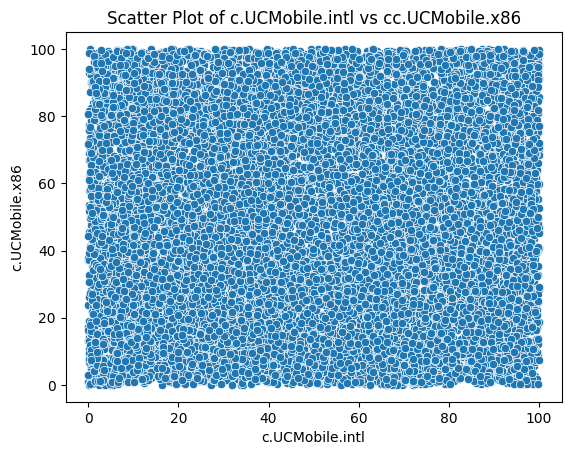

In [168]:
# Scatter plot
sns.scatterplot(x=data[a], y=data[b])
plt.title(f'Scatter Plot of {a} vs c{b}')
plt.xlabel(a)
plt.ylabel(b)

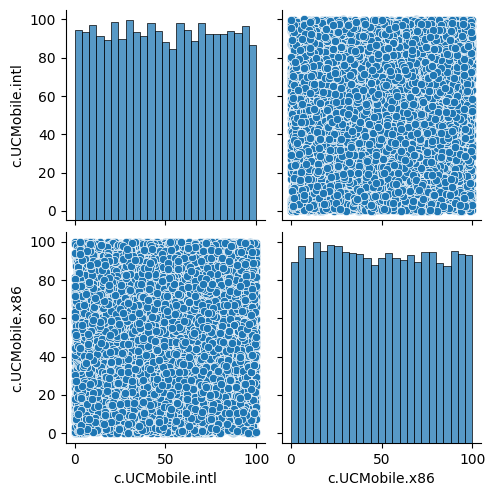

In [169]:
# Pair plot for pairwise analysis
sns.pairplot(data[[a,b]])

# continuous - continuous 
# data['c.android.gm'] - data['c.android.chrome']

In [170]:


# Correlation analysis
a, b = ['c.android.gm', 'c.android.chrome']
correlation = data[[a,b]].corr()
print(correlation)

                  c.android.gm  c.android.chrome
c.android.gm          1.000000          0.346253
c.android.chrome      0.346253          1.000000


In [171]:
# z koralecnej matice mozme vidiet pozitivnu korelaciu medzi dvomi premennymi

Text(0, 0.5, 'c.android.chrome')

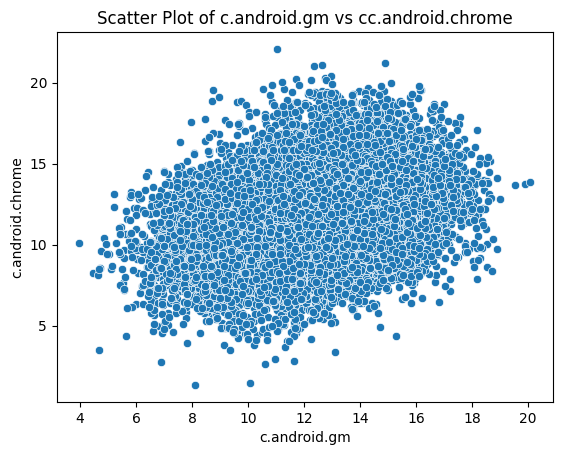

In [172]:
# Scatter plot
sns.scatterplot(x=data[a], y=data[b])
plt.title(f'Scatter Plot of {a} vs c{b}')
plt.xlabel(a)
plt.ylabel(b)

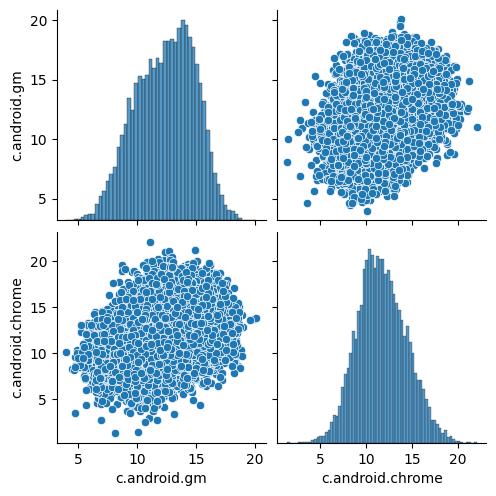

In [173]:
# Pair plot for pairwise analysis
sns.pairplot(data[[a,b]])

In [174]:
# continuous - continuous 
# data3['p.android.gms'] - data3['p.android.gm']

# Correlation analysis
a, b = ['p.android.gms', 'p.android.gm']
correlation = data3[[a,b]].corr()
print(correlation)

               p.android.gms  p.android.gm
p.android.gms       1.000000      0.000169
p.android.gm        0.000169      1.000000


In [175]:
# z koralecnej matice mozme vidiet ze data nie su takmer vobec medzi sebou zavisle 

Text(0, 0.5, 'p.android.gm')

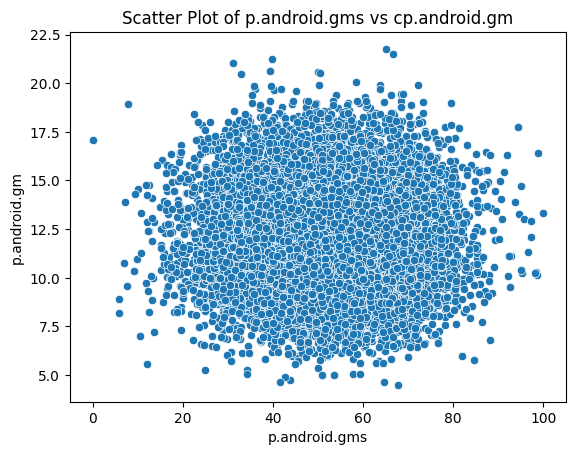

In [176]:
# Scatter plot
sns.scatterplot(x=data3[a], y=data3[b])
plt.title(f'Scatter Plot of {a} vs c{b}')
plt.xlabel(a)
plt.ylabel(b)

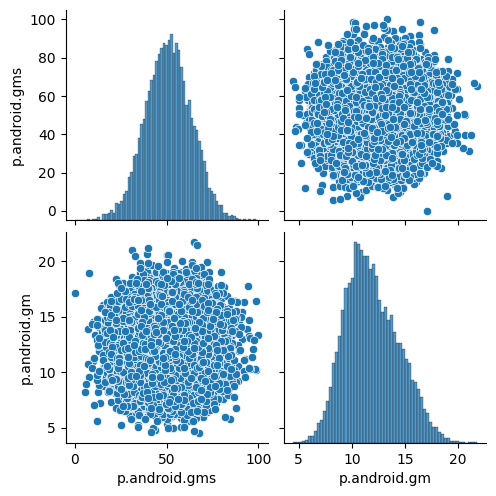

In [177]:
# Pair plot for pairwise analysis
sns.pairplot(data3[[a,b]])

- (D-1b) Párová analýza dát: Identifikujte závislosti medzi predikovanou premennou a ostatnými premennými (potenciálnymi prediktormi).

In [178]:
# in this step we will create correlation matrix for each set of data with numeric
# collumns and show it on a heat map

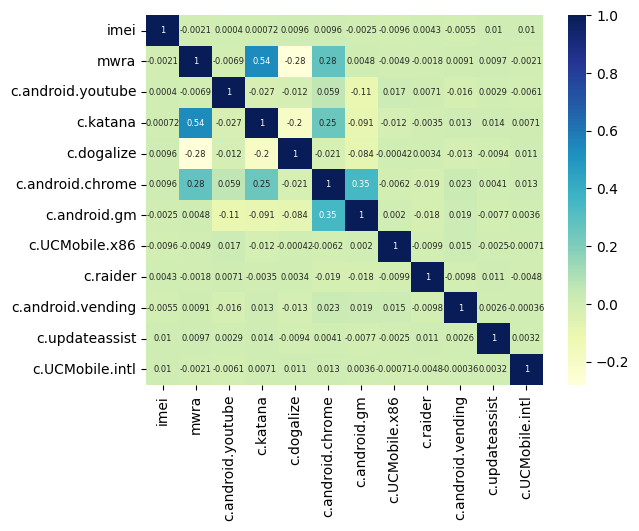

In [179]:
data_corr = data.corr(numeric_only=True)
dataplot = sns.heatmap(data_corr, cmap="YlGnBu", annot=True, annot_kws={"size": 6})
plt.show()

In [180]:
# from dataset connection.csv there is positive 0.54 correlation between
# c.katana and mwra
# and lowest correlation is with c.dogalize -0.28
data_mwra_corr = data_corr['mwra']
data_corr_filter = data_mwra_corr[data_mwra_corr != 1]
print(data_corr_filter.idxmin(), end=': ')
print(data_corr_filter.min())

print(data_corr_filter.idxmax(), end=': ')
print(data_corr_filter.max())

c.dogalize: -0.2805620409129388
c.katana: 0.53897021524728


In [181]:
# dataplot = sns.heatmap(data2.corr(numeric_only=True), cmap="YlGnBu", annot=True)
# plt.show()

In [182]:
# in dataset devices.csv there isnt mwra column

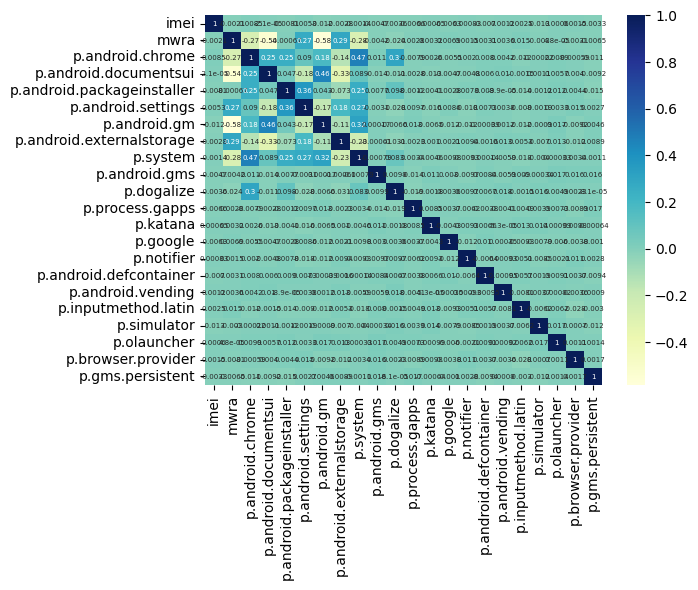

In [183]:
data3_corr = data3.corr(numeric_only=True)
dataplot = sns.heatmap(data3_corr, cmap="YlGnBu", annot=True, annot_kws={"size": 5})
plt.show()

In [184]:
data_mwra_corr = data3_corr['mwra']
data_corr_filter = data_mwra_corr[data_mwra_corr != 1]
print(data_corr_filter.idxmin(), end=': ')
print(data_corr_filter.min())

print(data_corr_filter.idxmax(), end=': ')
print(data_corr_filter.max())

p.android.gm: -0.583415699439614
p.android.externalstorage: 0.2927848024086175


In [185]:
# dataplot = sns.heatmap(data4.corr(numeric_only=True), cmap="YlGnBu", annot=True, annot_kws={"size": 5})
# plt.show()

In [186]:
# correlation with atribute mwra were following

# the greates possitive connections.csv => c.katana: 0.53897021524728

# the gretest negative processes.csv => p.android.gm: -0.583415699439614


- (E-1b) Dokumentujte Vaše prvotné zamyslenie k riešeniu zadania projektu, napr. sú niektoré atribúty medzi sebou závislé? od ktorých atribútov závisí predikovaná premenná? či je potrebné kombinovať záznamy z viacerých súborov?

In [187]:
# combining rows from different files is in this case inefficient and nearly imposible
# the only atribute that the files share is atribute imei which clearly cant be used as a key
# for joining the data. This is because the imei is not unique in any dataset
# the only way to get unique imei is combining it with timestamp and creating new atribute
# this will only allow to connect connections.csv and processes.csv because only those have both imei
# and timestamp atributes

In [188]:
# z korelacnej matice a heatmapy sme zisitli ze mwra najviac koreluje s dvomi atributmi a to c.katana a c.android.gm 
# ostatne premenne na sebe nie su moc zavisle jedine v ulohe C sme pozorovali korelaciu medzi c.android.gm a c.android.chrome

# Podiel prace
Filip - 50%
Milan - 50%